In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from statistics import mean
import ast
from itertools import combinations


def channel_group(x):
    if x.startswith('STAR'):
        return 'STAR'
    elif x.startswith('Colors'):
        return 'Colors'
    elif x.startswith('Zee'):
        return 'Zee'
    else:
        return x
    
sns.set_style('darkgrid')
rp_data = pd.read_csv('muse_rp.csv')
rp_data = rp_data.fillna('')
rp_data = rp_data[rp_data['Program name']!='SANJHER BAATI']
rp_data['female_screentime'] = rp_data['feminine_faces']/(rp_data['feminine_faces']+rp_data['masculine_faces'])
lng_name_dict = {'hi':'Hindi', 'ta': 'Tamil', 'te': 'Telugu', 'kn': 'Kannada', 'bn': 'Bengali'}
pl_dict = {v.upper():k for k,v in lng_name_dict.items()}
lng_data = pd.read_excel('language_stats.xlsx', sheet_name=['hi', 'ta', 'te', 'kn', 'bn'])
for lang in lng_data.keys():
    lng_data[lang] = lng_data[lang][lng_data[lang]['Transcript word count']>=100]

rp_data['Channel Major'] = rp_data['Channel'].map(channel_group)

blacklist = [x[0] for x in Counter(rp_data.video_key.values).items() if x[1]==2]
blacklist.extend([x[0] for x in Counter(rp_data['Cat No.'].values).items() if x[1]==2])



def count_der(x):
    if x!='None':
        return sum([y[1] for y in ast.literal_eval(x)])
    else:
        return 0
    
def count_names(x,group='gender',value='female'):
    if x!='None':
        if group == 'gender':
            return sum([y[3] for y in ast.literal_eval(x) if y[2] == value])
        elif group == 'religion':
            return sum([y[3] for y in ast.literal_eval(x) if y[1] == value])
    else:
        return 0

In [ ]:
print(languages)

hi 205
hi 72 10189 169252
hi ttest: 1.0307644987328588e-12
ta 235
ta 0 15082 276245
ta ttest: 0.5935133427531922
te 245
te 0 13321 226721
te ttest: 0.5150928907187543
kn 225
kn 0 10664 200333
kn ttest: 0.008016464236299932
bn 221
bn 66 20627 209898
bn ttest: 0.009053260064584762
t-test for fraction_derogatory_words
hi and ta: 7.276301140882418e-45
hi and te: 1.2567464060486417e-13
hi and kn: 9.655500627463133e-34
hi and bn: 6.667739966364161e-21
ta and te: 5.230169428569344e-27
ta and kn: 1.6201686004430564e-11
ta and bn: 1.0175856784813692e-07
te and kn: 3.2554123045857185e-14
te and bn: 1.511636321232109e-05
kn and bn: 0.003836383815894765
t-test for fraction_derogatory_words_nonstop
hi and ta: 2.7277053158539254e-50
hi and te: 2.7062620237689245e-28
hi and kn: 1.1093401456640393e-42
hi and bn: 2.2981038969875665e-29
ta and te: 7.890601972143108e-27
ta and kn: 1.3343224762659837e-11
ta and bn: 4.782257172565331e-08
te and kn: 1.695568846165566e-14
te and bn: 0.0011018889789842752
kn 

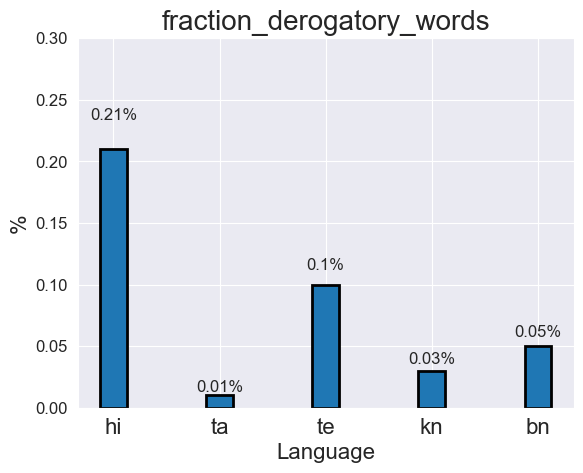

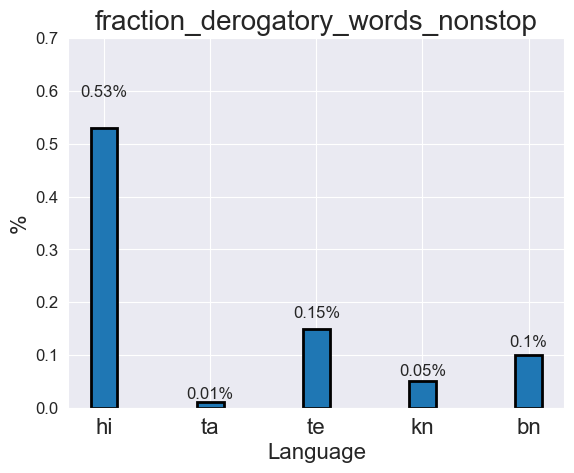

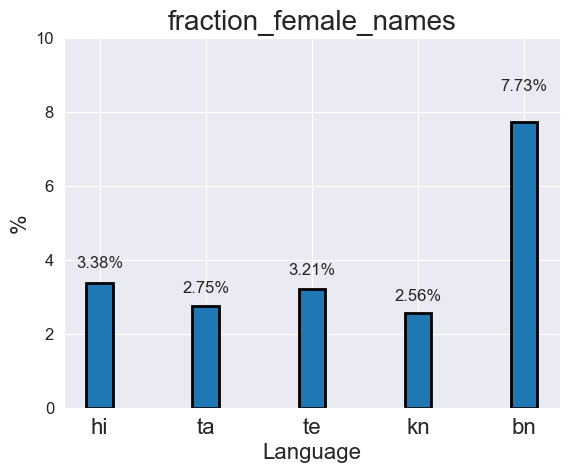

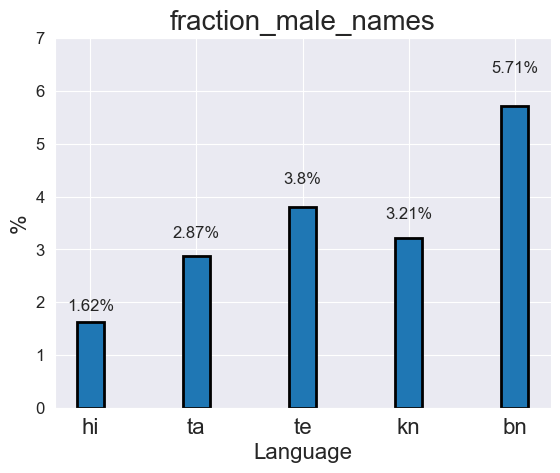

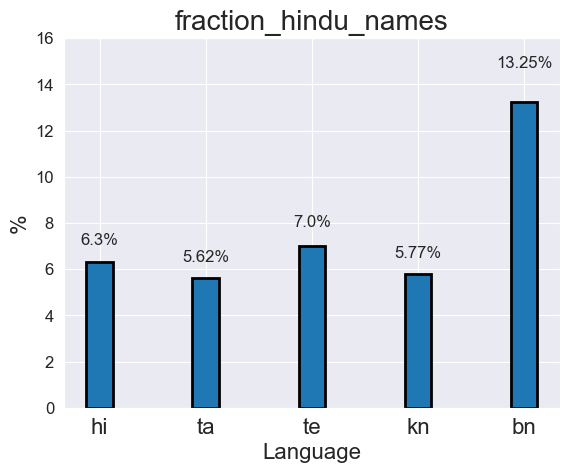

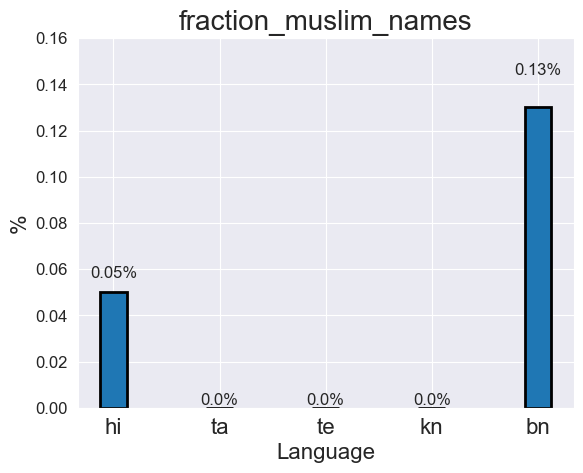

In [2]:
languages = list(lng_data.keys())
for lang in lng_data.keys():
    #l = len(lng_data[lang])
    print(lang, len(lng_data[lang]))
    #print(lang, l, len(lng_data[lang]))
    der = lng_data[lang]['Derogatory words (dictionary) word count']
    lng_data[lang]['Derogatory words raw count'] = der.map(count_der)
    per = lng_data[lang]['Person names word count']
    #print(der)
    lng_data[lang]['fraction_derogatory_words'] = lng_data[lang]['Derogatory words raw count']/lng_data[lang]['Transcript word count']*100
    lng_data[lang]['fraction_derogatory_words_nonstop'] = lng_data[lang]['Derogatory words raw count']/lng_data[lang]['Transcript non-stopword count']*100
    lng_data[lang]['female_names_count'] = per.map(lambda x: count_names(x, 'gender', 'female'))
    lng_data[lang]['male_names_count'] = per.map(lambda x: count_names(x, 'gender', 'male'))
    lng_data[lang]['hindu_names_count'] = per.map(lambda x: count_names(x, 'religion', 'hindu'))
    lng_data[lang]['muslim_names_count'] = per.map(lambda x: count_names(x, 'religion', 'muslim'))
    
    lng_data[lang]['fraction_female_names'] = lng_data[lang]['female_names_count']/lng_data[lang]['Transcript non-stopword count']*100
    lng_data[lang]['fraction_male_names'] = lng_data[lang]['male_names_count']/lng_data[lang]['Transcript non-stopword count']*100
    lng_data[lang]['fraction_hindu_names'] = lng_data[lang]['hindu_names_count']/lng_data[lang]['Transcript non-stopword count']*100
    lng_data[lang]['fraction_muslim_names'] = lng_data[lang]['muslim_names_count']/lng_data[lang]['Transcript non-stopword count']*100
    print(lang, lng_data[lang]['muslim_names_count'].sum(),lng_data[lang]['hindu_names_count'].sum(), lng_data[lang]['Transcript non-stopword count'].sum())
    print('{} ttest: {}'.format(lang, ttest_ind(lng_data[lang]['fraction_male_names'], lng_data[lang]['fraction_female_names']).pvalue))
def plot_fraction_words(group):
    fig, ax = plt.subplots()
    plot_data = [round(np.mean(lng_data[lang][group]),2) for lang in languages]
    ax.bar(languages, plot_data,
           edgecolor='black',
           linewidth=2, width=0.25)
    for i, v in enumerate(plot_data):
        ax.annotate(str(round(v, 2)) + "%", xy=(i, 1.1*v), ha='center', va='bottom', fontsize=12)

    ylim = min(100, max(plot_data)*1.2)
    # set the title and axis labels
    ax.set_title(f'{group}', fontsize=20)
    ax.set_xlabel('Language', fontsize=16)
    ax.set_ylabel('%', fontsize=16)
    ax.set_ylim([0, ylim])
    # get the x-tick labels
    labels = ax.get_xticklabels()
    yticks = ax.get_yticks()
    ax.set_yticks(yticks)
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=16)

    #plt.show()
    plt.savefig(f'plots/{group}.png', bbox_inches="tight", dpi=300)
    combns = list(combinations(languages, 2))
    #print(list(combns))
    print(f"t-test for {group}")
    for comb in combns:
        #print(comb)
        pval = ttest_ind(lng_data[comb[0]][group], lng_data[comb[1]][group]).pvalue
        print(f'{comb[0]} and {comb[1]}: {pval/len(combns)}')
    
plot_fraction_words('fraction_derogatory_words')
plot_fraction_words('fraction_derogatory_words_nonstop')
plot_fraction_words('fraction_female_names')
plot_fraction_words('fraction_male_names')
plot_fraction_words('fraction_hindu_names')
plot_fraction_words('fraction_muslim_names')

In [3]:
rp_cat = rp_data['Cat No.']
rp_vkey = rp_data['video_key']
columns_transferred = ['fraction_derogatory_words', 'fraction_derogatory_words_nonstop', 'fraction_female_names', 'fraction_male_names', 'fraction_hindu_names', 'fraction_muslim_names']
for col in columns_transferred:
    rp_data[col] = np.nan
    #print(rp_data[col])
    
for idx in range(len(rp_data)):
    sam_data = rp_data.iloc[idx]
    lng = sam_data['Programme Language']
    cat = sam_data['Cat No.']
    vkey = sam_data['video_key']
    if vkey in blacklist or cat in blacklist:
        continue
    #print(cat, vkey)
    lng_key_options = [cat, cat + '.mp4', cat + '.mov', vkey, vkey + '.mp4', vkey + '.mov']
    #print(lng_key_options)
    lng_data_sam = lng_data[pl_dict[lng]]
    #print(lng, len(lng_data_sam))
    for i, lng_vid in enumerate(lng_data_sam['Video ID'].values):
        if lng_vid in lng_key_options:
            #fr_der = lng_data_sam.iloc[i]['fraction_derogatory_words']
            #print(lng_data_sam.iloc[i]['Video ID'],lng_data_sam.iloc[i]['fraction_derogatory_words'])
            for col in columns_transferred:
                rp_data.loc[idx,col] = lng_data_sam.iloc[i][col]
            #    rp_data.loc[idx,col] = lng_data_sam.iloc[i][col]
            continue

BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
BENGALI 221
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
HINDI 205
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TA

TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235
TAMIL 235


In [ ]:
#lng_data['hi']['fraction_derogatory_words']
#rp_data['fraction_derogatory_words'].isna().sum()
#rp_data[rp_data['fraction_derogatory_words'].notnull()]

In [ ]:
# rp_cat = rp_data['Cat No.']
# rp_vkey = rp_data['video_key']
# der_data = {k: [] for k in lang}

# for lang in languages:
#     l = []
#     for idx in range(len(lng_data[lang])):
#         vid = lng_data[lang].iloc[idx]['Video ID'].split('.mp4')[0].split('.mov')[0]
#     #print(vid)
#         if vid in rp_vkey.values:
#             f = rp_data[rp_data['video_key']==vid]['female_screentime'].values[0]
#         elif vid in rp_cat.values:
#             f = rp_data[rp_data['Cat No.']==vid]['female_screentime'].values[0]
#         else:
#             f = 0 
#             print(vid, lang)
#         l.append(f)
#     lng_data[lang]['female_screentime'] = l
    
    

analysing variable ['Programme Language']
dict_keys(['BENGALI', 'HINDI', 'KANNADA', 'TAMIL', 'TELUGU'])


BENGALI
found 211 samples
 r:-0.05805729554290612, p-value: 0.40145291840001684


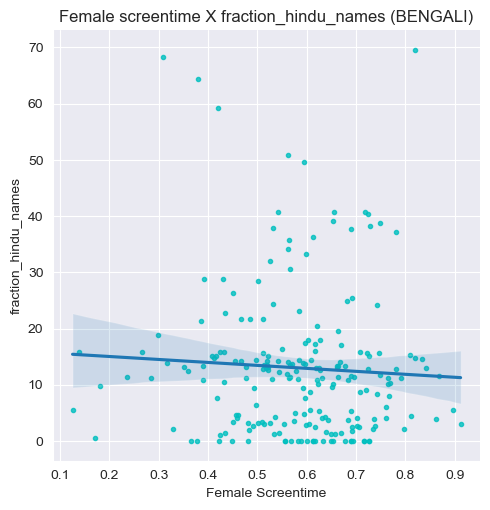



HINDI
found 184 samples
 r:-0.24032950965202682, p-value: 0.0010159633954586417


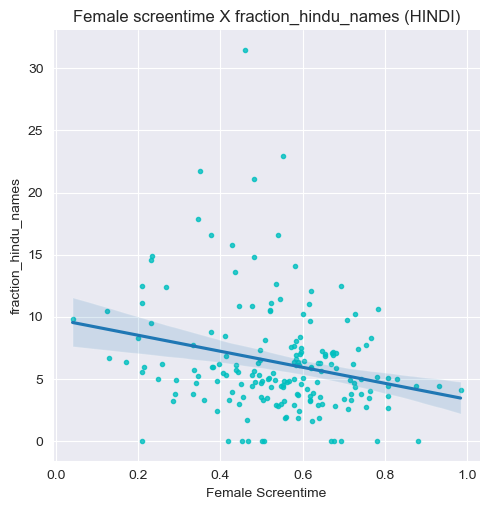



KANNADA
found 222 samples
 r:0.03594790438829297, p-value: 0.5941995338039635


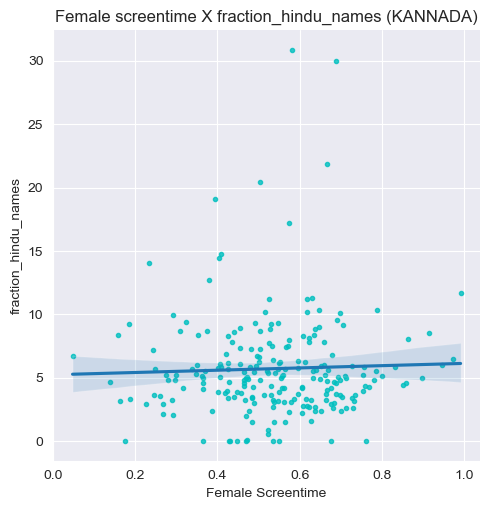



TAMIL
found 228 samples
 r:0.10806782199478873, p-value: 0.1036119529706415


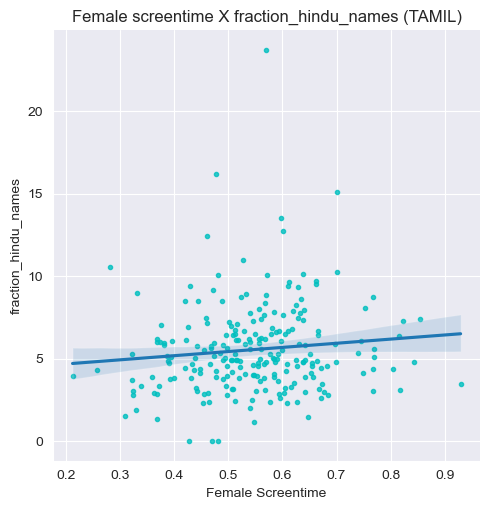



TELUGU
found 220 samples
 r:0.03862694968180953, p-value: 0.568759658682428


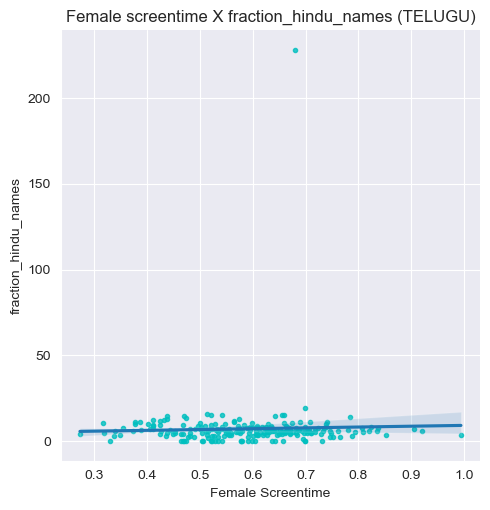

In [12]:
#rp_data = rp_data[rp_data['fraction_derogatory_words_nonstop'].notnull()]
from matplotlib import pyplot as plt
dep_variable = 'fraction_hindu_names'
group_variable = ["Programme Language"]

group_data = rp_data[rp_data[dep_variable].notnull()]
group_data = group_data.groupby(group_variable)
print(f"analysing variable {group_variable}")
print(group_data.groups.keys())

# if len(group_data.groups.keys())<6:
#     plt.subplot
for group in group_data.groups.keys(): 
    print(f"\n\n{group}")
    grp_data = group_data.get_group(group)
    num_samples = len(grp_data)
    if num_samples < 30:
        print('Less than 30 samples, skipping group')
        continue
    else:
        print(f"found {num_samples} samples")
        
    #m, b = np.polyfit(grp_data['female_screentime'], grp_data[dep_variable],  1)
    r, p = pearsonr(grp_data['female_screentime'], grp_data[dep_variable])
    print(f' r:{r}, p-value: {p}')

    ax = sns.lmplot(data=grp_data, x='female_screentime', y=dep_variable, fit_reg=True, markers='.',scatter_kws=dict(color='c'))
    plt.xlabel('Female Screentime')
    plt.ylabel(dep_variable)

    if isinstance(group, list) or isinstance(group, tuple):
        grpnamelabel = '_'.join([x.replace('/', '_') for x in group])
    else:
        grpnamelabel = group.replace('/', '_')
    plt.title(f"Female screentime X {dep_variable} ({grpnamelabel})")
    plt.show()
    ax.savefig(f'plots/fsc_{dep_variable}_{grpnamelabel}.png')

In [ ]:
## same analysis with age bins
## Add number of samples for each slide 

from matplotlib import pyplot as plt
dep_variable = 'fraction_muslim'
group_variable = ["Programme Language"]

group_data = rp_data[rp_data[dep_variable].notnull()]
group_data = group_data.groupby(group_variable)
print(f"analysing variable {group_variable}")
print(group_data.groups.keys())

# if len(group_data.groups.keys())<6:
#     plt.subplot
for group in group_data.groups.keys(): 
    print(f"\n\n{group}")
    grp_data = group_data.get_group(group)
    num_samples = len(grp_data)
    if num_samples < 30:
        print('Less than 30 samples, skipping group')
        continue
    else:
        print(f"found {num_samples} samples")
        
    #m, b = np.polyfit(grp_data['female_screentime'], grp_data[dep_variable],  1)
    r, p = pearsonr(grp_data['age_2_screen_time'], grp_data[dep_variable])
    print(f' r:{r}, p-value: {p}')

    ax = sns.lmplot(data=grp_data, x='age_2_screen_time', y=dep_variable, fit_reg=True, markers='.',scatter_kws=dict(color='c'))
#     sns.regplot(data=grp_data, x='age_2_screen_time', y=dep_variable, fit_reg=True, marker='s',scatter_kws=dict(color='g'), ax=ax)
#     sns.regplot(data=grp_data, x='age_3_screen_time', y=dep_variable, fit_reg=True, marker='x',scatter_kws=dict(color='r'), ax=ax)

    plt.xlabel('Adult Screentime')
    plt.ylabel(dep_variable)

    if isinstance(group, list) or isinstance(group, tuple):
        grpnamelabel = '_'.join([x.replace('/', '_') for x in group])
    else:
        grpnamelabel = group.replace('/', '_')
    plt.title(f"Adult screentime X {dep_variable} ({grpnamelabel})")
    plt.show()
    ax.savefig(f'plots/a2sc_{dep_variable}_{grpnamelabel}.png')

In [ ]:
print(len(rp_data[(rp_data['Programme Language']=='HINDI') & (~rp_data['fraction_derogatory_words_nonstop'].isna())]))

In [ ]:
blacklist